## Just some useful lines to begin

In [129]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
%matplotlib inline

## Coin flip example

In [8]:
#Flip a coin 10 times: how do we know is it "fair"?
np.random.randint(2,size=10)

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [18]:
#We got 8 tails!  Seems unfair.  But, we expect to get 8 heads less than 5.4% of the time!
#At this rate, we cannot reject the "null" (that the coin is indeed fair) at better than (the typical) 0.05 level
#We need more coin flips.
#Flip a coin 100x10 times to test: is it "fair"?
#Reject the "null" (the coin is fair) only if we get 
flipcoin = np.random.randint(2,size=(1e2,10))
sumrows = np.sum(flipcoin,axis=1)
print('Mean number of heads: {}'.format(np.mean(sumrows)))
print('How many times were there 8 heads? {}'.format(np.size(sumrows[sumrows == 8])))
#for i in np.arange(sumrows.size): print(flipcoin[i],sumrows[i])

Mean number of heads: 5.12
How many times were there 8 heads? 9


## Binomial distribution

In [115]:
?stats.binom

Probability to get >=8 heads: 0.0546875


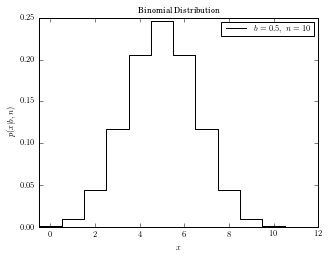

In [17]:
## THIS FIGURE IS BASED ON FIGURE 3.9
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general


from scipy import stats
dist = stats.binom(10,0.5) #N=10,b=0.5 (e.g. coin is fair)
r = dist.rvs(10) #the outcome of 10 random flips
p = dist.cdf(7) #probability to get >7 heads, k=8,9,or10 successes
print('Probability to get >=8 heads: {}'.format(1.-p))
#PLOT
x = np.arange(-1, 200)
fig, ax = plt.subplots(figsize=(5, 3.75))
plt.plot(x, dist.pmf(x), ls='-', c='black', label=r'$b=%.1f,\ n=%i$' %(0.5,10), linestyle='steps-mid')

plt.xlim(-0.5, 12)
plt.ylim(0, 0.25)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|b, n)$')
plt.title('Binomial Distribution')

plt.legend()
plt.show()

## "Simple Classification" figure

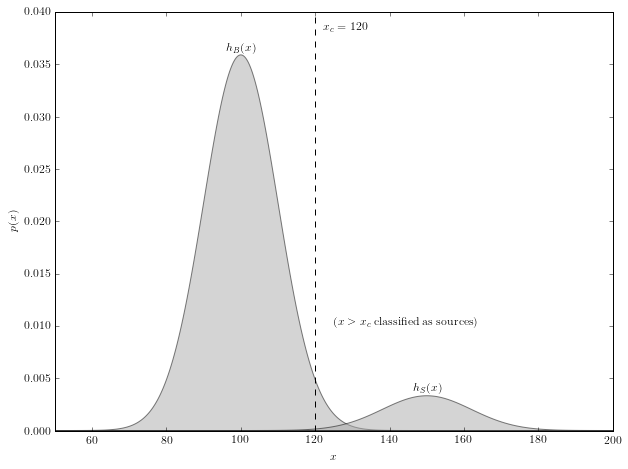

In [22]:
# FIGURE 4.5
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)

#------------------------------------------------------------
# Generate and draw the curves
x = np.linspace(50, 200, 1000)
p1 = 0.9 * norm(100, 10).pdf(x)
p2 = 0.1 * norm(150, 12).pdf(x)

#fig, ax = plt.subplots(figsize=(5, 3.75))
fig, ax = plt.subplots(figsize=(10, 7.5))
ax.fill(x, p1, ec='k', fc='#AAAAAA', alpha=0.5)
ax.fill(x, p2, '-k', fc='#AAAAAA', alpha=0.5)

ax.plot([120, 120], [0.0, 0.04], '--k')

ax.text(100, 0.036, r'$h_B(x)$', ha='center', va='bottom')
ax.text(150, 0.0035, r'$h_S(x)$', ha='center', va='bottom')
ax.text(122, 0.039, r'$x_c=120$', ha='left', va='top')
ax.text(125, 0.01, r'$(x > x_c\ {\rm classified\ as\ sources})$')

ax.set_xlim(50, 200)
ax.set_ylim(0, 0.04)

ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
plt.show()

## Testing regression toward the mean

In [30]:
import numpy as np
from scipy import stats
vals = np.random.normal(loc=70,scale=20,size=10)
print vals


[ 52.01558979  71.02403619  74.43712062  59.23350058  95.05036803
  81.06750977  47.20397508  73.28095642  59.51837542  97.16661682]


In [32]:
stats.histogram(vals)

HistogramResult(count=array([ 1.,  1.,  2.,  0.,  1.,  2.,  1.,  0.,  0.,  2.]), lowerlimit=44.428272764617496, binsize=5.5514046378534871, extrapoints=0)

In [31]:
?stats


## NON-PARAMETRIC

______________________________________________________________________
  Kolmogorov-Smirnov test: D = 0.0076  p = 0.6
  Anderson-Darling test: A^2 = 0.29
    significance  | critical value 
    --------------|----------------
    0.58          | 15.0%
    0.66          | 10.0%
    0.79          | 5.0%
    0.92          | 2.5%
    1.09          | 1.0%
  Shapiro-Wilk test: W = 1 p = 0.59
  Z_1 = 0.2
  Z_2 = 1.0
______________________________________________________________________
  Kolmogorov-Smirnov test: D = 0.28  p = 0
  Anderson-Darling test: A^2 = 1.9e+02
    significance  | critical value 
    --------------|----------------
    0.58          | 15.0%
    0.66          | 10.0%
    0.79          | 5.0%
    0.92          | 2.5%
    1.09          | 1.0%
  Shapiro-Wilk test: W = 0.94 p = 0
  Z_1 = 32.2
  Z_2 = 2.5


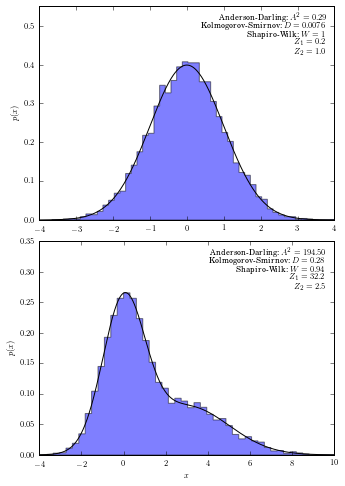

In [34]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

from astroML.stats import mean_sigma, median_sigmaG

# create some distributions
np.random.seed(1)
normal_vals = stats.norm(loc=0, scale=1).rvs(10000)
dual_vals = stats.norm(0, 1).rvs(10000)
dual_vals[:4000] = stats.norm(loc=3, scale=2).rvs(4000)

x = np.linspace(-4, 10, 1000)
normal_pdf = stats.norm(0, 1).pdf(x)
dual_pdf = 0.6 * stats.norm(0, 1).pdf(x) + 0.4 * stats.norm(3, 2).pdf(x)

vals = [normal_vals, dual_vals]
pdf = [normal_pdf, dual_pdf]
xlims = [(-4, 4), (-4, 10)]


#------------------------------------------------------------
# Compute the statistics and plot the results
fig = plt.figure(figsize=(5, 7))
fig.subplots_adjust(left=0.13, right=0.95,
                    bottom=0.06, top=0.95,
                    hspace=0.1)

for i in range(2):
    ax = fig.add_subplot(2, 1, 1 + i)  # 2 x 1 subplot

    # compute some statistics
    A2, sig, crit = stats.anderson(vals[i])
    D, pD = stats.kstest(vals[i], "norm")
    W, pW = stats.shapiro(vals[i])

    mu, sigma = mean_sigma(vals[i], ddof=1)
    median, sigmaG = median_sigmaG(vals[i])

    N = len(vals[i])
    Z1 = 1.3 * abs(mu - median) / sigma * np.sqrt(N)
    Z2 = 1.1 * abs(sigma / sigmaG - 1) * np.sqrt(N)

    print 70 * '_'
    print "  Kolmogorov-Smirnov test: D = %.2g  p = %.2g" % (D, pD)
    print "  Anderson-Darling test: A^2 = %.2g" % A2
    print "    significance  | critical value "
    print "    --------------|----------------"
    for j in range(len(sig)):
        print "    %.2f          | %.1f%%" % (sig[j], crit[j])
    print "  Shapiro-Wilk test: W = %.2g p = %.2g" % (W, pW)
    print "  Z_1 = %.1f" % Z1
    print "  Z_2 = %.1f" % Z2

    # plot a histogram
    ax.hist(vals[i], bins=50, normed=True, histtype='stepfilled', alpha=0.5)
    ax.plot(x, pdf[i], '-k')
    ax.set_xlim(xlims[i])

    # print information on the plot
    info = "Anderson-Darling: $A^2 = %.2f$\n" % A2
    info += "Kolmogorov-Smirnov: $D = %.2g$\n" % D
    info += "Shapiro-Wilk: $W = %.2g$\n" % W
    info += "$Z_1 = %.1f$\n$Z_2 = %.1f$" % (Z1, Z2)
    ax.text(0.97, 0.97, info,
            ha='right', va='top', transform=ax.transAxes)

    if i == 0:
        ax.set_ylim(0, 0.55)
    else:
        ax.set_ylim(0, 0.35)
        ax.set_xlabel('$x$')

    ax.set_ylabel('$p(x)$')

plt.show()

## VARIOUS TESTS

In [119]:
## KS test
## Sensitive to location, scale, shape of distribution
## See also ks_2samp, ksone
import numpy as np
from scipy import stats
N = 1e3
vals = np.random.normal(loc=0, scale=1, size=N)
stat,pval = stats.kstest(vals,"norm")
print('D-value:{}; p-value:{}'.format(stat,pval))

D-value:0.0206732163437; p-value:0.786190461279


In [122]:
## U test, or Mann-Whitney-Wilcoxon, or Wilcoxon Rank-sum test
## Test whether 2 data sets are drawn from distributions with different location parameters 
## i.e. different mean, same shape
## If known to be Gaussian, the test is called t test.
## i.e. different mu, same sigma
import numpy as np
from scipy import stats
N = 1e3
#x,y = np.random.normal(0,1,size=(2,N))
x= np.random.normal(0,1,size=N)
y= np.random.normal(0,1,size=1e4)
Tu, Pu = stats.mannwhitneyu(x,y)
print(Tu,Pu) #reutrns Mann-whitney statistics, one-sided p-value
print('compare with N1N2/2: {}'.format(N*N/2))
## If result is similar to N1N2/2, these draw from same distribution
t,p = stats.ttest_ind(x,y)
print(t,p) #returns t-statistic, two-tailed p-value

(4960942.0, 0.34166483107473788)
compare with N1N2/2: 500000.0
(-0.78344684016717703, 0.43338162990497386)


In [82]:
## Wilcoxon signed-rank test
## Compare means of 2 distributions, i.e. measure "before" and "after"
## Distributions have same number of elements N
N=1e3
x,y = np.random.normal(0,1,size=(2,N))
Tw,pw = stats.wilcoxon(x,y)
print(Tw,pw)

(240561.0, 0.28888019322445824)


In [101]:
## Anderson-Darling test
## Test whether the distribution is gaussian
N=1e3
x = np.random.normal(0,1,size=N)
A, crit, sig = stats.anderson(x,'norm')
print('Anderson-Darling {}'.format(A))
## K-S Test 
D, pD = stats.kstest(vals[i], "norm")
print('K-S Test {}'.format(D))
## Shapiro-Wilk (sensitive to outliers in the Gaussian tails)
s1, s2 = stats.shapiro(x)
print('Shapiro-Wilk {}'.format(s1)) #Value close to 1 means Gaussian


Anderson-Darling 0.506415872302
K-S Test 0.283268292611
Shapiro-Wilk 0.998545765877


In [95]:
## F test
## Compare variances of two samples
N=1e3
x,y = np.random.normal(0,1,size=(2,N))
F,pf = stats.f_oneway(x,y)
print(F,pf)

(0.92748238845765041, 0.33563452038854813)


## Histograms

(array([  1.,   1.,   0.,   2.,   4.,   2.,   2.,   2.,   8.,   9.,  12.,
         13.,  20.,  30.,  14.,  17.,  31.,  35.,  43.,  34.,  42.,  47.,
         51.,  55.,  60.,  52.,  47.,  53.,  48.,  40.,  26.,  42.,  25.,
         19.,  20.,  24.,  11.,   9.,   8.,  12.,   7.,   7.,   7.,   2.,
          1.,   1.,   1.,   2.,   0.,   1.]),
 array([-3.19489386, -3.06533314, -2.93577242, -2.80621169, -2.67665097,
        -2.54709025, -2.41752953, -2.28796881, -2.15840809, -2.02884737,
        -1.89928665, -1.76972593, -1.6401652 , -1.51060448, -1.38104376,
        -1.25148304, -1.12192232, -0.9923616 , -0.86280088, -0.73324016,
        -0.60367944, -0.47411872, -0.34455799, -0.21499727, -0.08543655,
         0.04412417,  0.17368489,  0.30324561,  0.43280633,  0.56236705,
         0.69192777,  0.8214885 ,  0.95104922,  1.08060994,  1.21017066,
         1.33973138,  1.4692921 ,  1.59885282,  1.72841354,  1.85797426,
         1.98753499,  2.11709571,  2.24665643,  2.37621715,  2.50577787,
 

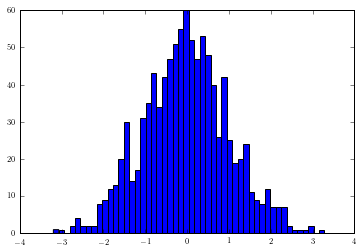

In [137]:
## SIMPLE HISTOGRAM
N=1e3
x = np.random.normal(size=N)
counts, bins = np.histogram(x,bins=50) #for computing, but not plotting a histogram
plt.hist(x,bins=bins) #for plotting a histogram

(array([   2.,    2.,    6.,    4.,   18.,   29.,   52.,   35.,   74.,
          82.,   95.,  110.,  110.,   97.,   76.,   74.,   37.,   38.,
          16.,   21.,   14.,    3.,    3.,    1.,    1.]),
 array([-3.19489386, -2.9293616 , -2.66382934, -2.39829708, -2.13276482,
        -1.86723256, -1.6017003 , -1.33616804, -1.07063578, -0.80510352,
        -0.53957126, -0.274039  , -0.00850674,  0.25702552,  0.52255778,
         0.78809004,  1.0536223 ,  1.31915456,  1.58468681,  1.85021907,
         2.11575133,  2.38128359,  2.64681585,  2.91234811,  3.17788037,
         3.44341263]),
 <a list of 25 Patch objects>)

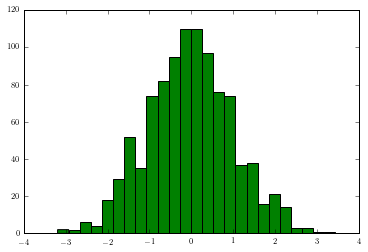

In [139]:
## For choosing bin-widths
from astroML.plotting import hist
hist(x, bins='freedman',color='green') #or 'knuth' or 'scott'